In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional

In [3]:
max_features = 10000  # Кількість слів для використання
maxlen = 500  # Максимальна довжина рецензії (у словах)

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 1s 0us/step


In [4]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [5]:
print(f'Train data shape: {x_train.shape}')
print(f'Test data shape: {x_test.shape}')

Train data shape: (25000, 500)
Test data shape: (25000, 500)


In [8]:
rnn_model = Sequential()
rnn_model.add(Embedding(max_features, 128, input_length=maxlen))
rnn_model.add(SimpleRNN(128))
rnn_model.add(Dense(1, activation='sigmoid'))

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
rnn_history = rnn_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 116s 361ms/step - loss: 0.6002 - accuracy: 0.6591 - val_loss: 0.5554 - val_accuracy: 0.7186
Epoch 2/10
313/313 [==============================] - 112s 357ms/step - loss: 0.5057 - accuracy: 0.7494 - val_loss: 0.5560 - val_accuracy: 0.7172
Epoch 3/10
313/313 [==============================] - 113s 362ms/step - loss: 0.3824 - accuracy: 0.8335 - val_loss: 0.6059 - val_accuracy: 0.6612
Epoch 4/10
313/313 [==============================] - 111s 356ms/step - loss: 0.3773 - accuracy: 0.8352 - val_loss: 0.4716 - val_accuracy: 0.7972
Epoch 5/10
313/313 [==============================] - 111s 356ms/step - loss: 0.2562 - accuracy: 0.9003 - val_loss: 0.5302 - val_accuracy: 0.7502
Epoch 6/10
313/313 [==============================] - 113s 360ms/step - loss: 0.2030 - accuracy: 0.9249 - val_loss: 0.5160 - val_accuracy: 0.7942
Epoch 7/10
313/313 [==============================] - 111s 356ms/step - loss: 0.3334 - accuracy: 0.8547 - val_loss: 0.5397 -

In [11]:
lstm_model = Sequential()
lstm_model.add(Embedding(max_features, 128, input_length=maxlen))
lstm_model.add(LSTM(128))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
lstm_history = lstm_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 444s 1s/step - loss: 0.4977 - accuracy: 0.7606 - val_loss: 0.3712 - val_accuracy: 0.8406
Epoch 2/10
313/313 [==============================] - 433s 1s/step - loss: 0.3841 - accuracy: 0.8375 - val_loss: 0.4198 - val_accuracy: 0.8136
Epoch 3/10
313/313 [==============================] - 432s 1s/step - loss: 0.2558 - accuracy: 0.9011 - val_loss: 0.3335 - val_accuracy: 0.8682
Epoch 4/10
313/313 [==============================] - 429s 1s/step - loss: 0.2086 - accuracy: 0.9215 - val_loss: 0.3951 - val_accuracy: 0.8456
Epoch 5/10
313/313 [==============================] - 433s 1s/step - loss: 0.1593 - accuracy: 0.9434 - val_loss: 0.4091 - val_accuracy: 0.8456
Epoch 6/10
313/313 [==============================] - 437s 1s/step - loss: 0.1251 - accuracy: 0.9566 - val_loss: 0.4394 - val_accuracy: 0.8382
Epoch 7/10
313/313 [==============================] - 453s 1s/step - loss: 0.0922 - accuracy: 0.9707 - val_loss: 0.4981 - val_accuracy: 0.8552

In [15]:
bi_lstm_model = Sequential()
bi_lstm_model.add(Embedding(max_features, 128, input_length=maxlen))
bi_lstm_model.add(Bidirectional(LSTM(128)))
bi_lstm_model.add(Dense(1, activation='sigmoid'))

bi_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
bi_lstm_history = bi_lstm_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 830s 3s/step - loss: 0.4988 - accuracy: 0.7508 - val_loss: 0.3916 - val_accuracy: 0.8256
Epoch 2/10
313/313 [==============================] - 839s 3s/step - loss: 0.3021 - accuracy: 0.8766 - val_loss: 0.4769 - val_accuracy: 0.8294
Epoch 3/10
313/313 [==============================] - 835s 3s/step - loss: 0.2237 - accuracy: 0.9162 - val_loss: 0.3794 - val_accuracy: 0.8566
Epoch 4/10
313/313 [==============================] - 834s 3s/step - loss: 0.1637 - accuracy: 0.9413 - val_loss: 0.3419 - val_accuracy: 0.8688
Epoch 5/10
313/313 [==============================] - 831s 3s/step - loss: 0.1121 - accuracy: 0.9623 - val_loss: 0.4058 - val_accuracy: 0.8576
Epoch 6/10
313/313 [==============================] - 830s 3s/step - loss: 0.1041 - accuracy: 0.9640 - val_loss: 0.4311 - val_accuracy: 0.8464
Epoch 7/10
313/313 [==============================] - 824s 3s/step - loss: 0.0834 - accuracy: 0.9717 - val_loss: 0.5879 - val_accuracy: 0.8584

In [25]:
deep_lstm_model = Sequential()
deep_lstm_model.add(Embedding(max_features, 128, input_length=maxlen))
deep_lstm_model.add(LSTM(128, return_sequences=True))
deep_lstm_model.add(LSTM(128))
deep_lstm_model.add(Dense(1, activation='sigmoid'))

deep_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
deep_lstm_history = deep_lstm_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 856s 3s/step - loss: 0.4398 - accuracy: 0.7912 - val_loss: 0.3475 - val_accuracy: 0.8616
Epoch 2/10
313/313 [==============================] - 859s 3s/step - loss: 0.2437 - accuracy: 0.9065 - val_loss: 0.3310 - val_accuracy: 0.8690
Epoch 3/10
313/313 [==============================] - 857s 3s/step - loss: 0.1886 - accuracy: 0.9297 - val_loss: 0.3673 - val_accuracy: 0.8596
Epoch 4/10
313/313 [==============================] - 861s 3s/step - loss: 0.1346 - accuracy: 0.9512 - val_loss: 0.3854 - val_accuracy: 0.8686
Epoch 5/10
313/313 [==============================] - 861s 3s/step - loss: 0.1083 - accuracy: 0.9628 - val_loss: 0.4994 - val_accuracy: 0.8660
Epoch 6/10
313/313 [==============================] - 867s 3s/step - loss: 0.0749 - accuracy: 0.9763 - val_loss: 0.5319 - val_accuracy: 0.8622
Epoch 7/10
313/313 [==============================] - 871s 3s/step - loss: 0.0577 - accuracy: 0.9807 - val_loss: 0.5789 - val_accuracy: 0.8484

In [27]:
def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(16, 10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_' + key], '--', label=name.title() + ' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(), label=name.title() + ' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()
    plt.grid()
    plt.show()

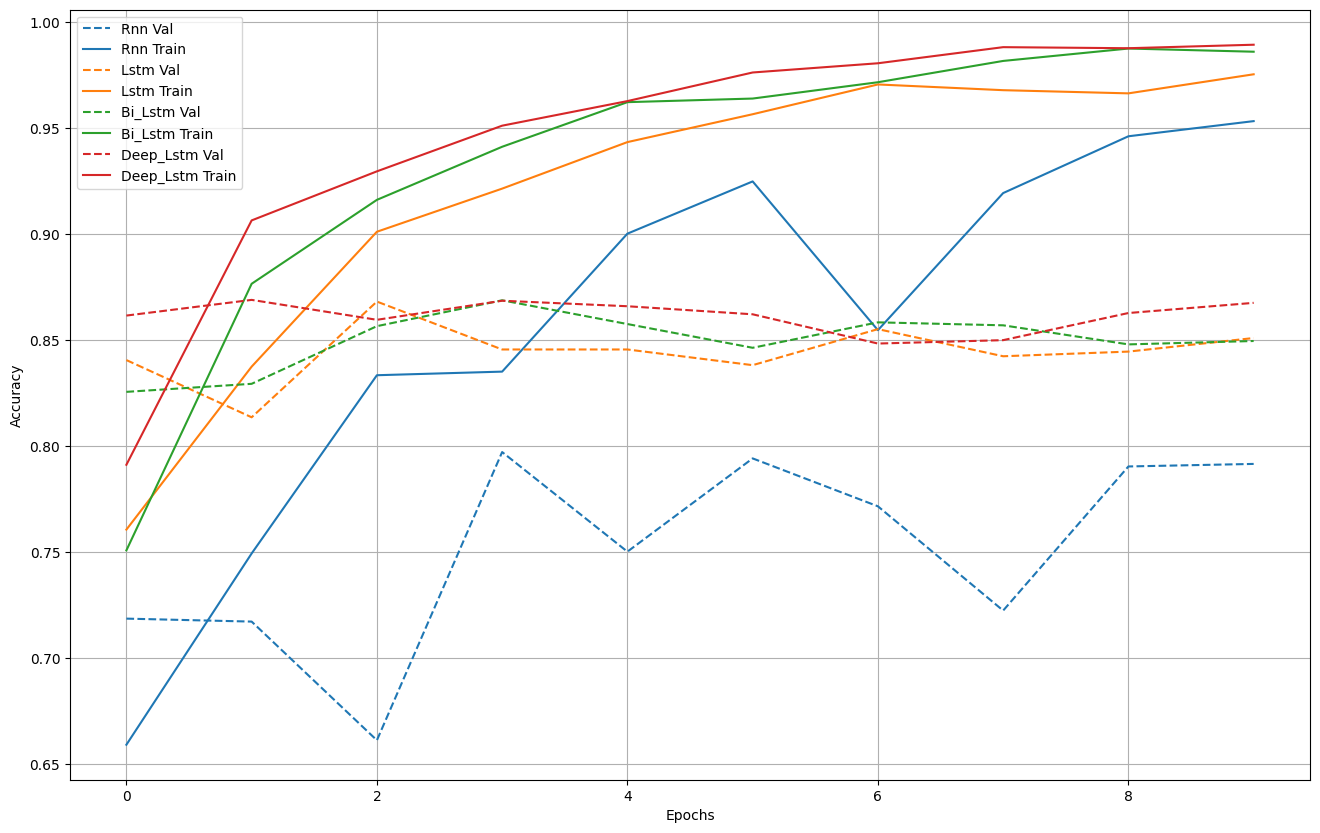

In [28]:
plot_history([('rnn', rnn_history), ('lstm', lstm_history), ('bi_lstm', bi_lstm_history), ('deep_lstm', deep_lstm_history)])

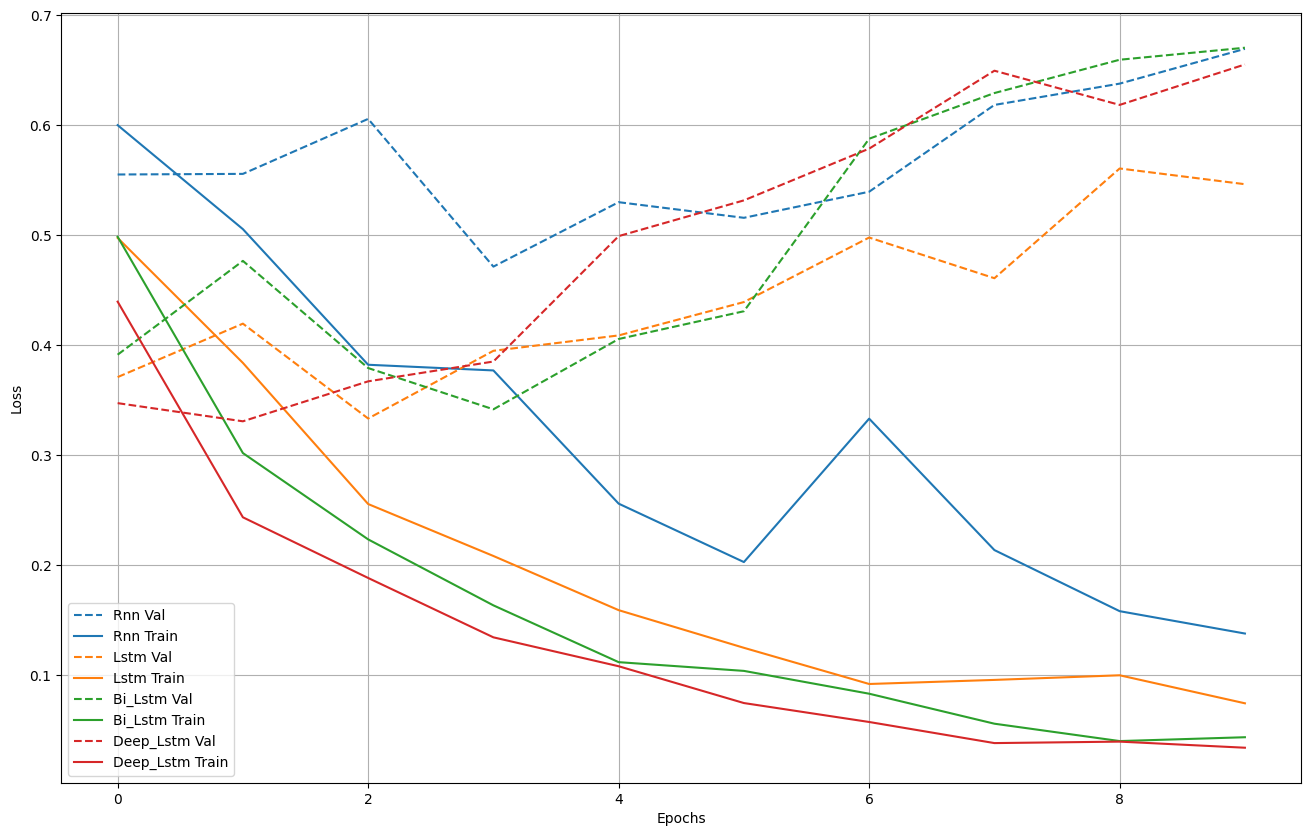

In [29]:
plot_history([('rnn', rnn_history), ('lstm', lstm_history), ('bi_lstm', bi_lstm_history), ('deep_lstm', deep_lstm_history)], key='loss')